In [9]:
import random
import time
import matplotlib.pyplot as plt

In [10]:
def generate_unique_random_numbers(num_numbers, min_value, max_value):
    """
    Generates a list of unique random positive integers within the specified range.

    Args:
        num_numbers (int): Number of random integers to generate.
        min_value (int): Minimum value for the random integers (inclusive).
        max_value (int): Maximum value for the random integers (exclusive).

    Returns:
        list: List of unique random positive integers.
    """
    if num_numbers > max_value - min_value:
        raise ValueError("Cannot generate more unique numbers than the range allows.")

    random_numbers = random.sample(range(min_value, max_value), num_numbers)
    return random_numbers

In [11]:
def insertion_sort(random_array):

    array = random_array.copy()

    for i in range(1, len(array)):

        key_item = array[i]
        j = i - 1

        while j >= 0 and array[j] > key_item:
            array[j + 1] = array[j]
            j -= 1

        array[j + 1] = key_item

    return array

In [12]:
def bubble_sort(random_array):

    array = random_array.copy()

    n = len(array)

    for i in range(n):

        already_sorted = True

        for j in range(n - i - 1):

            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                already_sorted = False

        if already_sorted:
            break

    return array

In [13]:
def selection_sort(random_array):

    A = random_array.copy()

    for i in range(len(A) - 1):
        min_idx = i

        for j in range(i + 1, len(A)):
            if A[min_idx] > A[j]:
                min_idx = j

        A[i], A[min_idx] = A[min_idx], A[i]

    return A

In [14]:
def merge(arr1, arr2):
    i = 0
    j = 0
    result = []
    while i < len(arr1) and j < len(arr2):
        if arr2[j] > arr1[i]:
            result.append(arr1[i])
            i += 1
        else:
            result.append(arr2[j])
            j += 1
    while i < len(arr1):
        result.append(arr1[i])
        i += 1
    while j < len(arr2):
        result.append(arr2[j])
        j += 1

    return result


def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)

In [15]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)


def heap_sort(random_array):

    arr = random_array.copy()

    n = len(arr)

    for i in range(n // 2, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

In [16]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        left = [x for x in arr[1:] if x < pivot]
        right = [x for x in arr[1:] if x >= pivot]
        return quick_sort(left) + [pivot] + quick_sort(right)

In [18]:
bubble_sort_execution_time = []
insertion_sort_execution_time = []
selection_sort_execution_time = []
merge_sort_execution_time = []
heap_sort_execution_time = []
quick_sort_execution_time = []
nro_attempts = []

for x in range(1, 5):
    nro_attempts.append(10**x)
    random_numbers = generate_unique_random_numbers(10**x, 0, 10000000)

    start = time.perf_counter()
    i = bubble_sort(random_numbers)
    end = time.perf_counter()
    bubble_sort_execution_time.append(end - start)

    start = time.perf_counter()
    j = insertion_sort(random_numbers)
    end = time.perf_counter()
    insertion_sort_execution_time.append(end - start)

    start = time.perf_counter()
    k = selection_sort(random_numbers)
    end = time.perf_counter()
    selection_sort_execution_time.append(end - start)

    start = time.perf_counter()
    l = merge_sort(random_numbers)
    end = time.perf_counter()
    merge_sort_execution_time.append(end - start)

    start = time.perf_counter()
    m = heap_sort(random_numbers)
    end = time.perf_counter()
    heap_sort_execution_time.append(end - start)

    start = time.perf_counter()
    n = quick_sort(random_numbers)
    end = time.perf_counter()
    quick_sort_execution_time.append(end - start)

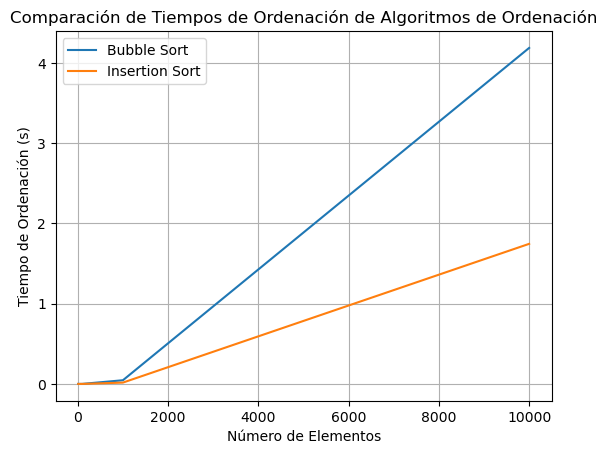

In [19]:
plt.plot(nro_attempts, bubble_sort_execution_time, label="Bubble Sort")
plt.plot(nro_attempts, insertion_sort_execution_time, label="Insertion Sort")
plt.plot(nro_attempts, selection_sort_execution_time, label="Selection Sort")
plt.plot(nro_attempts, merge_sort_execution_time, label="Merge Sort")
plt.plot(nro_attempts, heap_sort_execution_time, label="Heap Sort")
plt.plot(nro_attempts, quick_sort_execution_time, label="Quick Sort")
plt.legend()
plt.title("Sorting algorithm time comparison")
plt.xlabel("Number of elements")
plt.ylabel("Sort time (s)")
plt.grid()
plt.show()